<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

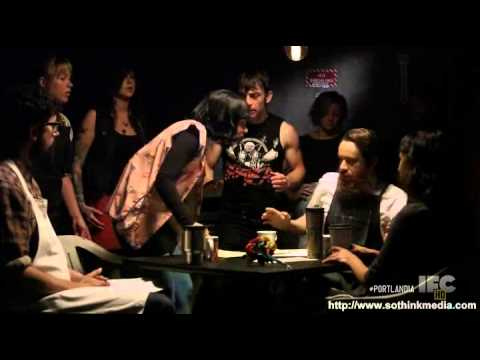

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\git\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/nimu77/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# import library
import spacy

nlp = spacy.load("en_core_web_lg")

In [5]:
shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [6]:
# strip space in the front and back
shops['full_review_text'] = shops['full_review_text'].str.strip(' ')

In [7]:
# checking to see if it has been removed
shops['full_review_text'][3]

'11/25/2016 Very cool decor! Good drinks Nice seating  However...  Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd.  Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average.  It feels like a Los Angeles coffee shot that is out of place.'

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
# creating token columns without extending stop words

tokens = []

for doc in nlp.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
        
shops['tokens'] = tokens    

In [9]:
shops['tokens'].head()

0    [11/25/2016, 1, check, love, love, loved, atmo...
1    [12/2/2016, listed, date, night, austin, ambia...
2    [11/30/2016, 1, check, listed, brunch, spots, ...
3    [11/25/2016, cool, decor, good, drinks, nice, ...
4    [12/3/2016, 1, check, located, northcross, mal...
Name: tokens, dtype: object

In [10]:
# import library
from collections import Counter

# creating a function which takes a corpus of document and returns dataframe of word counts for us to analyze
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [11]:
wc = count(shops['tokens'])
print(wc.shape)
wc.head()

(19626, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,,4343,14990,1.0,0.038901,0.038901,0.570247
9,coffee,4911,10539,2.0,0.027350,0.066251,0.644827
110,place,3665,5444,3.0,0.014128,0.080379,0.481224
154,good,2792,3986,4.0,0.010344,0.090724,0.366597
98,great,2843,3933,5.0,0.010207,0.100930,0.373293


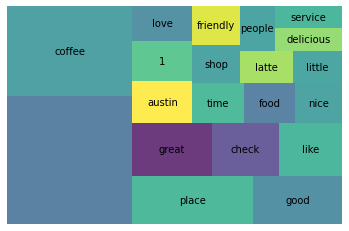

In [12]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [13]:
# creating stop words
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'coffee', 'latte', '1'])
STOP_WORDS

{' ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '1',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'coffee',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 

In [14]:
#updating token column after adding extendend words
tokens = []

for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [15]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
106,place,3665,5444,1.0,0.015295,0.015295,0.481224
150,good,2792,3986,2.0,0.011199,0.026494,0.366597
94,great,2843,3933,3.0,0.011050,0.037545,0.373293
11,check,3129,3357,4.0,0.009432,0.046976,0.410846
163,like,2142,3125,5.0,0.008780,0.055756,0.281250


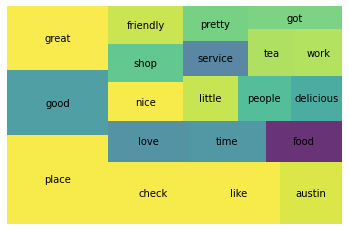

In [16]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## Lemmatization

In [17]:
# function to 
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'coffee', 'latte', '1', 'drink', 'tea'])

    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [18]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
shops['lemmas'].head()

0    [11/25/2016, check, love, love, love, atmosphe...
1    [12/2/2016, list, date, night, austin, ambianc...
2    [11/30/2016, check, list, brunch, spots, love,...
3    [11/25/2016, cool, decor, good, drink, nice, s...
4    [12/3/2016, check, locate, northcross, mall, s...
Name: lemmas, dtype: object

In [23]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atmo...,5.0 star rating,"[11/25/2016, check, love, love, loved, atmosph...","[11/25/2016, check, love, love, love, atmosphe..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambian...",4.0 star rating,"[12/2/2016, listed, date, night, austin, ambia...","[12/2/2016, list, date, night, austin, ambianc..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots I...,4.0 star rating,"[11/30/2016, check, listed, brunch, spots, lov...","[11/30/2016, check, list, brunch, spots, love,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice s...,2.0 star rating,"[11/25/2016, cool, decor, good, drinks, nice, ...","[11/25/2016, cool, decor, good, drink, nice, s..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within t...,4.0 star rating,"[12/3/2016, check, located, northcross, mall, ...","[12/3/2016, check, locate, northcross, mall, s..."


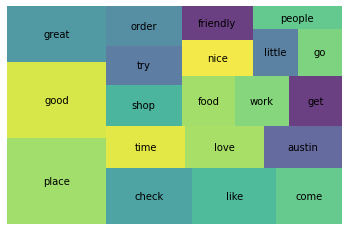

In [24]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [25]:
list(shops)

['coffee_shop_name', 'full_review_text', 'star_rating', 'tokens', 'lemmas']

In [27]:
dfa = shops[['lemmas', 'star_rating']].copy()

In [29]:
dfa['star_rating'].nunique()

5

In [30]:
dfa['rating'] = dfa['star_rating'][0]
dfa

,lemmas,star_rating,rating
0,"[11/25/2016, check, love, love, love, atmosphe...",5.0 star rating,5.0 star rating
1,"[12/2/2016, list, date, night, austin, ambianc...",4.0 star rating,5.0 star rating
2,"[11/30/2016, check, list, brunch, spots, love,...",4.0 star rating,5.0 star rating
3,"[11/25/2016, cool, decor, good, drink, nice, s...",2.0 star rating,5.0 star rating
4,"[12/3/2016, check, locate, northcross, mall, s...",4.0 star rating,5.0 star rating
...,...,...,...
7611,"[2/19/2015, actually, step, restaurant, chance...",4.0 star rating,5.0 star rating
7612,"[1/21/2016, ok, steeping, room, awesome, great...",5.0 star rating,5.0 star rating
7613,"[4/30/2015, love, come, atmosphere, pretty, fr...",4.0 star rating,5.0 star rating
7614,"[8/2/2015, food, average, booth, feel, clean, ...",3.0 star rating,5.0 star rating


In [44]:
import re
def fixed_rating(str_review):
    
    return int(re.sub('[^1-5]', '', str_review))

In [45]:
shops['rating'] = shops['star_rating'].apply(fixed_rating)
shops['rating'].head()

0    5
1    4
2    4
3    2
4    4
Name: rating, dtype: int64

In [46]:
type(shops['rating'][0])

numpy.int64

In [47]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atmo...,5.0 star rating,"[11/25/2016, check, love, love, loved, atmosph...","[11/25/2016, check, love, love, love, atmosphe...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambian...",4.0 star rating,"[12/2/2016, listed, date, night, austin, ambia...","[12/2/2016, list, date, night, austin, ambianc...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots I...,4.0 star rating,"[11/30/2016, check, listed, brunch, spots, lov...","[11/30/2016, check, list, brunch, spots, love,...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice s...,2.0 star rating,"[11/25/2016, cool, decor, good, drinks, nice, ...","[11/25/2016, cool, decor, good, drink, nice, s...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within t...,4.0 star rating,"[12/3/2016, check, located, northcross, mall, ...","[12/3/2016, check, locate, northcross, mall, s...",4


In [58]:
dfa = shops[['lemmas', 'rating']].copy()

In [59]:
df2 = dfa['lemmas'].apply(pd.Series) \
      .merge(dfa, right_index = True, left_index = True) \
      .drop(["lemmas"], axis=1) \
    .melt(id_vars = ['rating'], value_name = "lemma")

In [60]:
df2

,rating,variable,lemma
0,5,0,11/25/2016
1,4,0,12/2/2016
2,4,0,11/30/2016
3,2,0,11/25/2016
4,4,0,12/3/2016
...,...,...,...
2993083,4,392,NaN
2993084,5,392,NaN
2993085,4,392,NaN
2993086,3,392,NaN


In [61]:
import numpy as np
df2['variable'] = df2['variable'].replace(0, np.NaN)
df2 = df2.dropna(axis=0)
df2['variable'] = df2['variable'].astype(int)
df2.head()

C:\Users\nirma\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,rating,variable,lemma
7616,5,1,check
7617,4,1,list
7618,4,1,check
7619,2,1,cool
7620,4,1,check


In [62]:
df2.dtypes

rating       int64
variable     int32
lemma       object
dtype: object

In [63]:
df2 = df2.groupby('lemma').mean()

In [64]:
df2.describe()

,rating,variable
count,14821.000000,14821.000000
mean,4.018127,42.847308
std,0.944548,32.886479
min,1.000000,1.000000
25%,3.750000,23.000000
50%,4.000000,37.000000
75%,5.000000,52.666667
max,5.000000,375.000000


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

